<h1 style="background: #A5ADA7; color:#E1E2DF; font-size: 50px; padding-top: 40px; border: 8px solid #B68E7E; line-height: 0.7"><center>데이터 소개</center></h1>

- 성별(Gender): 학생의 성별
- 인종/민족(Race/Ethnicity): 학생이 속한 인종 및 민족 그룹
- 부모의 교육수준(Parental Level of Education): 학생의 부모 최종 학력
- 점심 여부(Lunch): 학생이 점심을 챙겨먹는지 아닌지의 여부
- 예습 여부(Test Preparation Course): 학생이 시험을 준비했는가 안했는가
- 수학, 독해, 작문의 점수: 학생의 각 과목에 대한 점수

In [10]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("./StudentsPerformance.csv")

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
print(df.shape)
list(df.columns)

(1000, 8)


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- 위 데이터를 통해 볼때 5개의 범주형 칼럼과 3개의 숫자형 칼럼이 있음을 알수 있다.
- 또한 8개의 컬럼에는 모두 Null 값이 존재하지 않는다

<h1 style="background: #A5ADA7; color:#E1E2DF; font-size: 50px; padding-top: 40px; border: 8px solid #B68E7E; line-height: 0.7"><center>데이터 분석</center></h1>

### 각 컬럼의 데이터 분포를 살펴보자

#### 1. 인종/민족의 분포

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

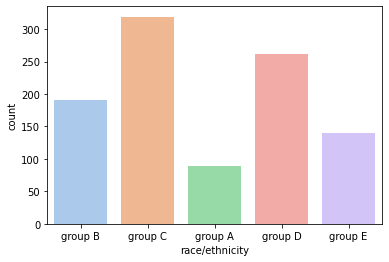

In [20]:
sns.countplot(x='race/ethnicity', data=df, palette='pastel')

#### 2. 성별, 점심여부, 예습여부의 분포

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

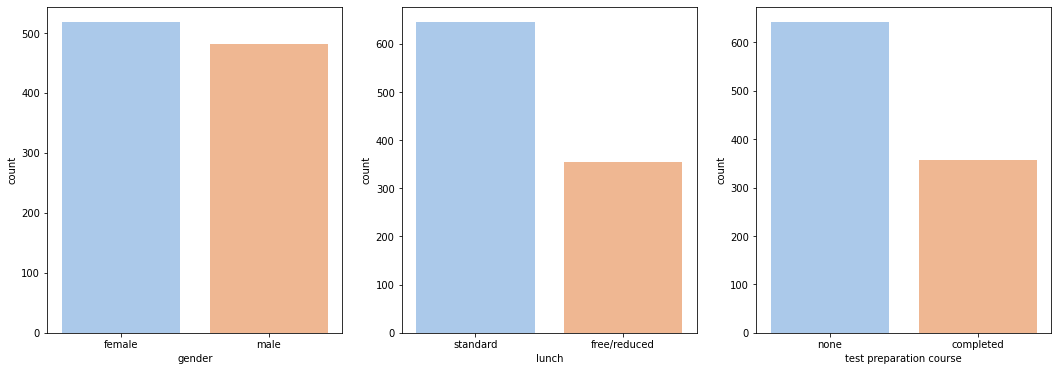

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], x='gender', data=df, palette='pastel')
sns.countplot(ax=axes[1], x='lunch', data=df, palette='pastel')
sns.countplot(ax=axes[2], x='test preparation course', data=df, palette='pastel')

#### 3. 부모의 교육수준 분포

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

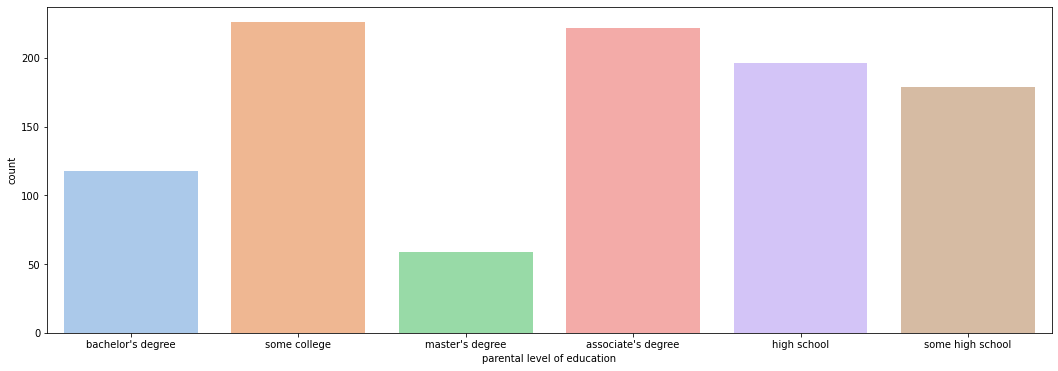

In [30]:
fig, axes = plt.subplots(figsize=(18, 6))
sns.countplot(ax=axes, x='parental level of education', data=df, palette='pastel')

#### 4. 각 과목의 점수 분포

<AxesSubplot:xlabel='math score', ylabel='count'>

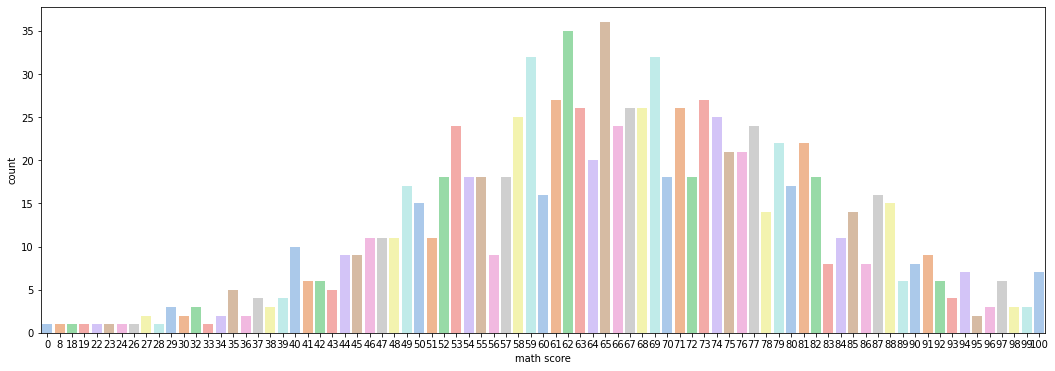

In [34]:
fig, axes = plt.subplots(figsize=(18, 6))
sns.countplot(ax=axes, x='math score', data=df, palette='pastel')

<AxesSubplot:xlabel='writing score', ylabel='count'>

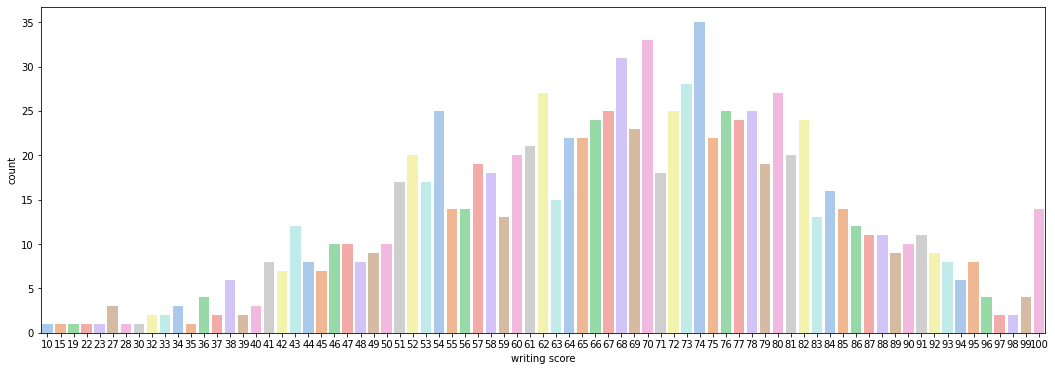

In [36]:
fig, axes = plt.subplots(figsize=(18, 6))
sns.countplot(ax=axes, x='writing score', data=df, palette='pastel')

<AxesSubplot:xlabel='reading score', ylabel='count'>

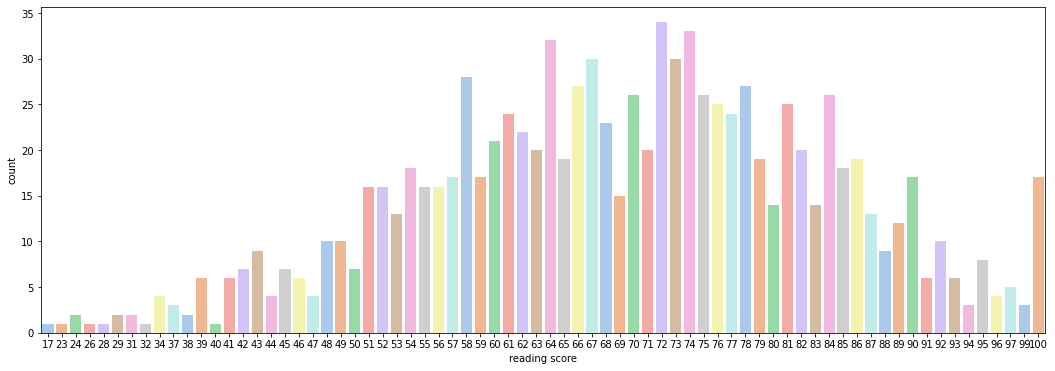

In [37]:
fig, axes = plt.subplots(figsize=(18, 6))
sns.countplot(ax=axes, x='reading score', data=df, palette='pastel')

<h1 style="background: #A5ADA7; color:#E1E2DF; font-size: 50px; padding-top: 40px; border: 8px solid #B68E7E; line-height: 0.7"><center>가설 검증</center></h1>

- 예습을 한 학생들은 점수가 다른 학생들에 비해 높을 것이다.
- 부모의 학력수준이 높은 학생들은 성적이 높을 것이다.

### 1. 예습을 하여 시험 준비를 한 학생들은 다른 학생들보다 점수가 높을 것이다.

<AxesSubplot:xlabel='writing score', ylabel='Count'>

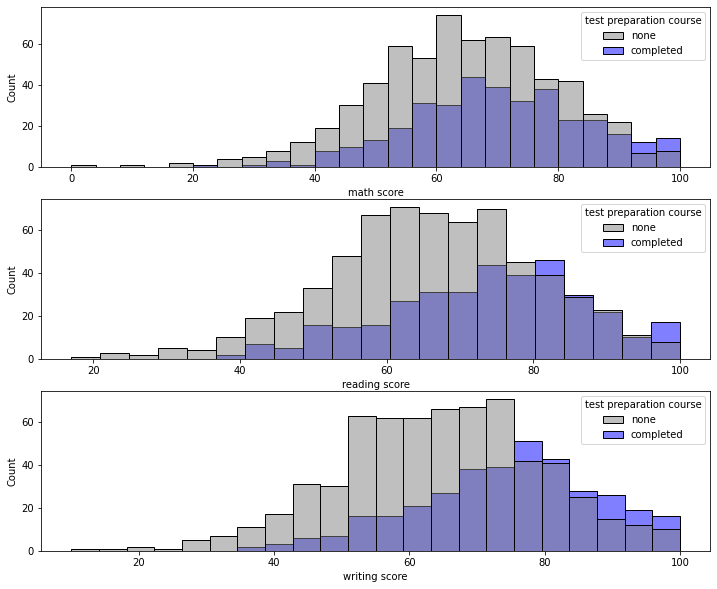

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.histplot(ax=axes[0], x='math score', data=df, 
            hue='test preparation course', palette=['gray', 'blue'])

sns.histplot(ax=axes[1], x='reading score', data=df,
            hue='test preparation course', palette=['gray', 'blue'])

sns.histplot(ax=axes[2], x='writing score', data=df,
            hue='test preparation course', palette=['gray', 'blue'])

#### 위 그래프를 참고했을때 예습을 한 학생들은 그렇지 않은 학생들보다 평균적으로 점수가 높은 것을 알 수 있음.

### 2. 부모의 학력 수준이 높은 학생들은 성적이 높을 것이다.
- 각 과목의 합격 점수를 40점으로 한다.

In [50]:
passmark = 40

#### 1) 수학 과목

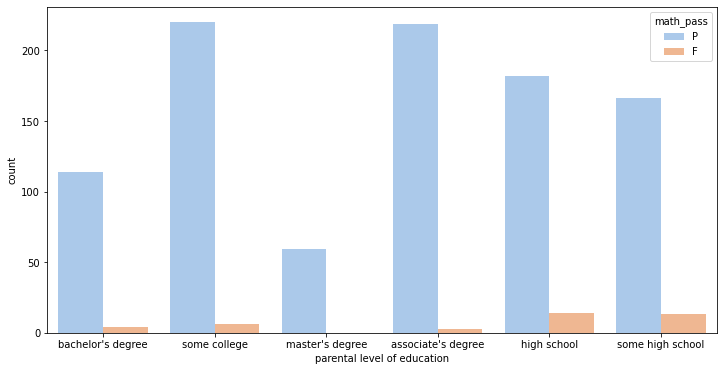

In [51]:
df['math_pass'] = np.where(df['math score'] < passmark, 'F', 'P')
fig, axes = plt.subplots(figsize=(12, 6))
p = sns.countplot(ax=axes, x='parental level of education', data=df, 
                 hue='math_pass', palette='pastel')

#### 2) 독해 과목

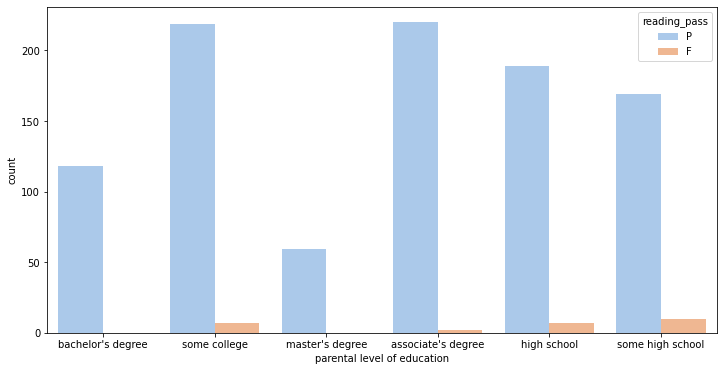

In [52]:
df['reading_pass'] = np.where(df['reading score'] < passmark, 'F', 'P')
fig, axes = plt.subplots(figsize=(12, 6))
p = sns.countplot(ax=axes, x='parental level of education', data=df, 
                 hue='reading_pass', palette='pastel')

#### 3) 작문 과목

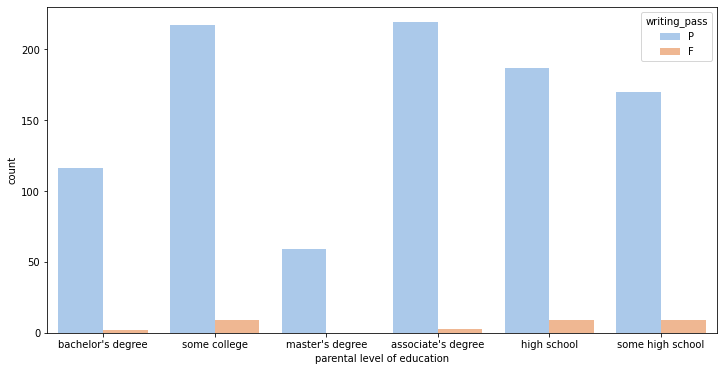

In [53]:
df['writing_pass'] = np.where(df['writing score'] < passmark, 'F', 'P')
fig, axes = plt.subplots(figsize=(12, 6))
p = sns.countplot(ax=axes, x='parental level of education', data=df, 
                 hue='writing_pass', palette='pastel')

####  4) 전 과목

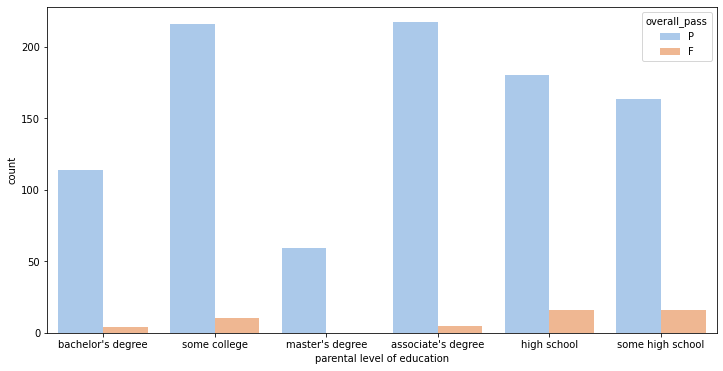

In [55]:
df['overall_pass'] = df.apply(lambda x: 'F' if x['math_pass'] == 'F' or
                             x['reading_pass'] == 'F' or x['writing_pass'] == 'F'
                             else 'P', axis=1)
fig, axes = plt.subplots(figsize=(12, 6))
p = sns.countplot(ax=axes, x='parental level of education', data=df, 
                 hue='overall_pass', palette='pastel')

<AxesSubplot:xlabel='parental level of education', ylabel='overall_score'>

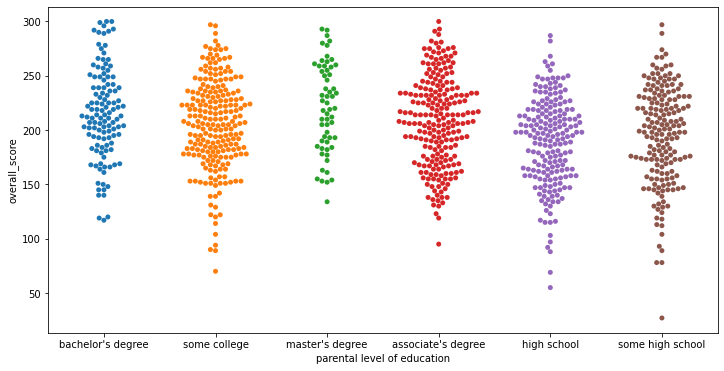

In [56]:
df['overall_score'] = df['math score'] + df['writing score'] + df['reading score']
fig, axes = plt.subplots(figsize=(12, 6))
sns.swarmplot(ax=axes, x='parental level of education', y='overall_score', data=df)

#### 위 그래프를 종합적으로 참고 했을 때 부모의 학력 수준이 높은 학생들은 점수의 분포대가 부모의 학력 수준이 낮은 학생들보다 윗쪽에 포진되어 있는 것을 알 수 있음.

#### 또한 학력 수준이 높은 수록 같은 그룹의 가장 높은 점수와 낮은 점수간의 간격이 좁은 것을 알 수 있음.

#### 결론적으로 부모의 학력 수준이 높을 수록 학생의 성적이 좋다는 가설은 옳다고 봄.